<a href="https://colab.research.google.com/github/cicbeast/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/Raul_DS_Unit_1_Sprint_Challenge_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 3

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [0]:
# TODO
# First we import!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

%matplotlib inline

In [72]:
# Now we need to load the data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data'
df = pd.read_csv(url, header=None)
# header=None was needed to avoid a lost row
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [73]:
# Let's use our metadata to name the columns correctly
colnames = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 
            'A12', 'A13', 'A14', 'A15', 'A16']

df = pd.read_csv(url, header=None, names=colnames)
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [74]:
# Now let's take a look at our dataframe
df.shape # Checking for the appropriate number of instances

(690, 16)

In [75]:
df.info() # Checking for correct datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
A1     690 non-null object
A2     690 non-null object
A3     690 non-null float64
A4     690 non-null object
A5     690 non-null object
A6     690 non-null object
A7     690 non-null object
A8     690 non-null float64
A9     690 non-null object
A10    690 non-null object
A11    690 non-null int64
A12    690 non-null object
A13    690 non-null object
A14    690 non-null object
A15    690 non-null int64
A16    690 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 86.3+ KB


In [76]:
# We were expecting 6 numerical datatypes and only have 4
df.describe

<bound method NDFrame.describe of     A1     A2      A3 A4 A5  A6  A7  ...  A10 A11 A12  A13    A14    A15 A16
0    b  30.83   0.000  u  g   w   v  ...    t   1   f    g  00202      0   +
1    a  58.67   4.460  u  g   q   h  ...    t   6   f    g  00043    560   +
2    a  24.50   0.500  u  g   q   h  ...    f   0   f    g  00280    824   +
3    b  27.83   1.540  u  g   w   v  ...    t   5   t    g  00100      3   +
4    b  20.17   5.625  u  g   w   v  ...    f   0   f    s  00120      0   +
5    b  32.08   4.000  u  g   m   v  ...    f   0   t    g  00360      0   +
6    b  33.17   1.040  u  g   r   h  ...    f   0   t    g  00164  31285   +
7    a  22.92  11.585  u  g  cc   v  ...    f   0   f    g  00080   1349   +
8    b  54.42   0.500  y  p   k   h  ...    f   0   f    g  00180    314   +
9    b  42.50   4.915  y  p   w   v  ...    f   0   t    g  00052   1442   +
10   b  22.08   0.830  u  g   c   h  ...    f   0   t    g  00128      0   +
11   b  29.92   1.835  u  g   c   h  ...  

In [77]:
# We can see a ? in our dataframe. We'll set that to NaN and check again
df = pd.read_csv(url, header=None, names=colnames, na_values='?')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
A1     678 non-null object
A2     678 non-null float64
A3     690 non-null float64
A4     684 non-null object
A5     684 non-null object
A6     681 non-null object
A7     681 non-null object
A8     690 non-null float64
A9     690 non-null object
A10    690 non-null object
A11    690 non-null int64
A12    690 non-null object
A13    690 non-null object
A14    677 non-null float64
A15    690 non-null int64
A16    690 non-null object
dtypes: float64(4), int64(2), object(10)
memory usage: 86.3+ KB


In [78]:
# That did it. Now we have 6 numerical columns.
# All continuous columns should be dtype float, though

df = df.astype({'A11': float, 'A15': float})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
A1     678 non-null object
A2     678 non-null float64
A3     690 non-null float64
A4     684 non-null object
A5     684 non-null object
A6     681 non-null object
A7     681 non-null object
A8     690 non-null float64
A9     690 non-null object
A10    690 non-null object
A11    690 non-null float64
A12    690 non-null object
A13    690 non-null object
A14    677 non-null float64
A15    690 non-null float64
A16    690 non-null object
dtypes: float64(6), object(10)
memory usage: 86.3+ KB


## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [79]:
# Let's sample the dataframe
df.sample(15)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
468,b,22.08,2.335,u,g,k,v,0.750,f,f,0.0,f,g,180.0,0.0,-
103,b,25.00,12.000,u,g,k,v,2.250,t,t,2.0,t,g,120.0,5.0,-
156,a,28.50,3.040,y,p,x,h,2.540,t,t,1.0,f,g,70.0,0.0,+
251,b,41.42,5.000,u,g,q,h,5.000,t,t,6.0,t,g,470.0,0.0,+
165,a,40.83,10.000,u,g,q,h,1.750,t,f,0.0,f,g,29.0,837.0,+
615,b,29.42,1.250,u,g,c,h,0.250,f,t,2.0,t,g,400.0,108.0,-
431,b,22.92,3.165,y,p,c,v,0.165,f,f,0.0,f,g,160.0,1058.0,-
189,a,33.08,4.625,u,g,q,h,1.625,t,t,2.0,f,g,0.0,0.0,+
464,a,23.00,1.835,u,g,j,j,0.000,f,t,1.0,f,g,200.0,53.0,-
666,a,21.75,11.750,u,g,c,v,0.250,f,f,0.0,t,g,180.0,0.0,-


In [80]:
# Let's separate by A16
acc = df[df['A16'] == '+']
rej = df[df['A16'] == '-']

acc.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1.0,f,g,202.0,0.0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6.0,f,g,43.0,560.0,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0.0,f,g,280.0,824.0,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5.0,t,g,100.0,3.0,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0.0,f,s,120.0,0.0,+


In [81]:
rej.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
70,b,32.33,7.5,u,g,e,bb,1.585,t,f,0.0,t,s,420.0,0.0,-
71,b,34.83,4.0,u,g,d,bb,12.500,t,f,0.0,t,g,NaN,0.0,-
72,a,38.58,5.0,u,g,cc,v,13.500,t,f,0.0,t,g,980.0,0.0,-
73,b,44.25,0.5,u,g,m,v,10.750,t,f,0.0,f,s,400.0,0.0,-
74,b,44.83,7.0,y,p,c,v,1.625,f,f,0.0,f,g,160.0,2.0,-


In [82]:
# We also want the continuous columns
cont_col = ['A2', 'A3', 'A8', 'A11', 'A14', 'A15', ]

acc_cont = acc[cont_col]
rej_cont = rej[cont_col]

acc_cont.head()

,A2,A3,A8,A11,A14,A15
0,30.83,0.000,1.25,1.0,202.0,0.0
1,58.67,4.460,3.04,6.0,43.0,560.0
2,24.50,0.500,1.50,0.0,280.0,824.0
3,27.83,1.540,3.75,5.0,100.0,3.0
4,20.17,5.625,1.71,0.0,120.0,0.0


In [83]:
rej_cont.head()

,A2,A3,A8,A11,A14,A15
70,32.33,7.5,1.585,0.0,420.0,0.0
71,34.83,4.0,12.500,0.0,NaN,0.0
72,38.58,5.0,13.500,0.0,980.0,0.0
73,44.25,0.5,10.750,0.0,400.0,0.0
74,44.83,7.0,1.625,0.0,160.0,2.0


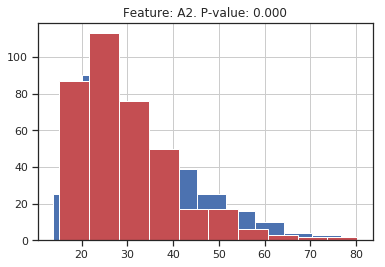

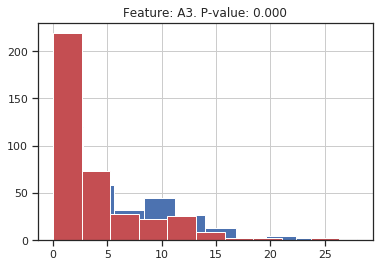

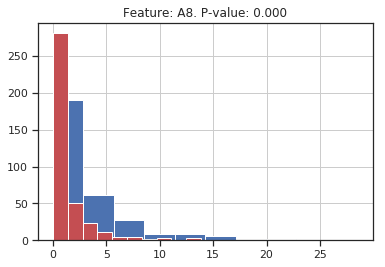

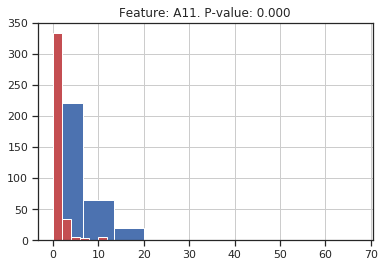

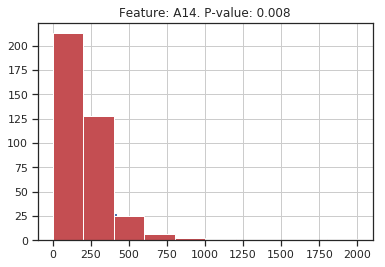

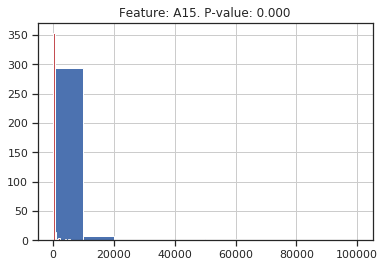

<Figure size 432x288 with 0 Axes>

In [84]:
# Now let's quickly visualize

X = df
def plotpval(X):
  headers = cont_col
  for names in headers:
    group1 = acc_cont[names]
    group2 = rej_cont[names]
    group1.hist(color='b')
    group2.hist(color='r')
    _, pvalue = ttest_ind(group1, group2, equal_var=False, nan_policy='omit')
    plt.title(f'Feature: {names}. P-value: {pvalue:.3f}')
    plt.figure()

plotpval(X)

In [85]:
# And get info
acc_cont.describe()

,A2,A3,A8,A11,A14,A15
count,305.000000,307.000000,307.000000,307.000000,301.000000,307.000000
mean,33.720492,5.904951,3.427899,4.605863,164.421927,2038.859935
std,12.809641,5.471485,4.120792,6.320242,161.770675,7659.763941
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.170000,1.500000,0.750000,0.000000,0.000000,0.000000
50%,30.500000,4.460000,2.000000,3.000000,120.000000,221.000000
75%,41.330000,9.520000,5.000000,7.000000,280.000000,1209.000000
max,76.750000,28.000000,28.500000,67.000000,840.000000,100000.000000


In [86]:
# And for rej_cont
rej_cont.describe()

,A2,A3,A8,A11,A14,A15
count,373.000000,383.000000,383.000000,383.000000,376.000000,383.000000
mean,29.808231,3.839948,1.257924,0.631854,199.699468,198.605744
std,10.919291,4.337662,2.120481,1.900049,181.564835,671.608839
min,15.170000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.835000,0.125000,0.000000,100.000000,0.000000
50%,27.330000,2.210000,0.415000,0.000000,167.500000,1.000000
75%,34.830000,5.000000,1.500000,0.000000,272.000000,67.000000
max,80.250000,26.335000,13.875000,20.000000,2000.000000,5552.000000


In [87]:
# From describe() and the visualization, it looks like A15 is very different 
# Let's t-test

acc15 = acc_cont['A15']
rej15 = rej_cont['A15']
_, pvalue = ttest_ind(acc15, rej15, equal_var=False, nan_policy='omit')
print(pvalue)

3.5433798702024966e-05


In [88]:
# It also looks like A2 is more similar
# Let's t-test again

acc2 = acc_cont['A2']
rej2 = rej_cont['A2']
_, pvalue = ttest_ind(acc2, rej2, equal_var=False, nan_policy='omit')
print(pvalue)


2.7673850124552034e-05


In [89]:
# Not so much,
# Let's t-test A14
acc14 = acc_cont['A14']
rej14= rej_cont['A14']
_, pvalue = ttest_ind(acc14, rej14, equal_var=False, nan_policy='omit')
print(pvalue)


0.0077778250827957


In [90]:
# Still a fairly small Pvalue, but much larger that A15 and A2
# Next we need to test our categorical data
cat_col = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13', 'A16']
df_cat = df[cat_col]

df_cat.sample(10)

,A1,A4,A5,A6,A7,A9,A10,A12,A13,A16
290,b,u,g,m,v,f,f,t,s,-
615,b,u,g,c,h,f,t,t,g,-
338,a,y,p,aa,v,f,f,f,g,-
203,a,u,g,q,v,t,t,t,g,+
107,a,y,p,aa,v,t,f,f,g,-
246,b,u,g,cc,h,t,t,t,g,+
462,b,u,g,c,v,f,f,f,g,-
93,b,y,p,c,h,t,f,t,g,-
522,b,u,g,m,v,t,t,f,g,+
160,b,u,g,x,h,t,t,f,g,+


In [91]:
# We have no real way to choose which column to test first
# So we're going in numerical order
table_acc1 = pd.crosstab(df_cat['A1'],df_cat['A16'])
table_acc1

A16,+,-
A1,,
a,98,112
b,206,262


In [92]:
# And now the chi-squared test
chi2, p, df, expect = chi2_contingency(table_acc1)
print(f'chi2 stat: {chi2}')
print(f'p-value: {p}')
print(f'df: {df}')
print(f'expected freq: {expect}')

chi2 stat: 0.31128326491619945
p-value: 0.5768937883001117
df: 1
expected freq: [[ 94.15929204 115.84070796]
 [209.84070796 258.15929204]]


In [93]:
# Now let's do A4
table_acc4 = pd.crosstab(df_cat['A4'],df_cat['A16'])
table_acc4

A16,+,-
A4,,
l,2,0
u,256,263
y,45,118


In [94]:
# and the ch-squared test
chi2, p, df, expect = chi2_contingency(table_acc4)
print(f'chi2 stat: {chi2}')
print(f'p-value: {p}')
print(f'df: {df}')
print(f'expected freq: {expect}')


chi2 stat: 26.234074966202144
p-value: 2.010680204180363e-06
df: 2
expected freq: [[  0.88596491   1.11403509]
 [229.90789474 289.09210526]
 [ 72.20614035  90.79385965]]


## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

 - I actually had to run 3 t-tests to get both an extreme and less-extreme result. As mentioned in the instructions my test of column A14 resulted in a p-value that significantly small statistically (small enough to reject the null hypothesis). But when compared to the p-values  when columns A2 and A15 were tested, A14 was a much less extreme result (E-3 vs E-5). Still, as all p-values were below our threshold, we can reject our null hypothesis that "there is no quantitative difference in the tested features between the people who were accepted and those who were rejected"
 
 - My 2 chi-squared tests resulted in 1 large p-value and 1 very small p-value. This tells me that, with a ,p-value of 0.57689, between A1 and the class labels, there is some dependence. And, with a p-value of 2.01E-6,  A4 and the class labels are independentn attributes.
 
 - The most challenging part ot this challenge was sensibly interpretting the results of the hypothesis tests